In [87]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pickle
import sys
import mediapipe as mp
from keras.utils import to_categorical
import random

classes_list = ['sad','friendly','trap','photo','map','bright','deaf','away','help','I','meet','my','name']
num_of_videos = 30
sequence_len = 20
image_height = 240
image_width = 320

(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)


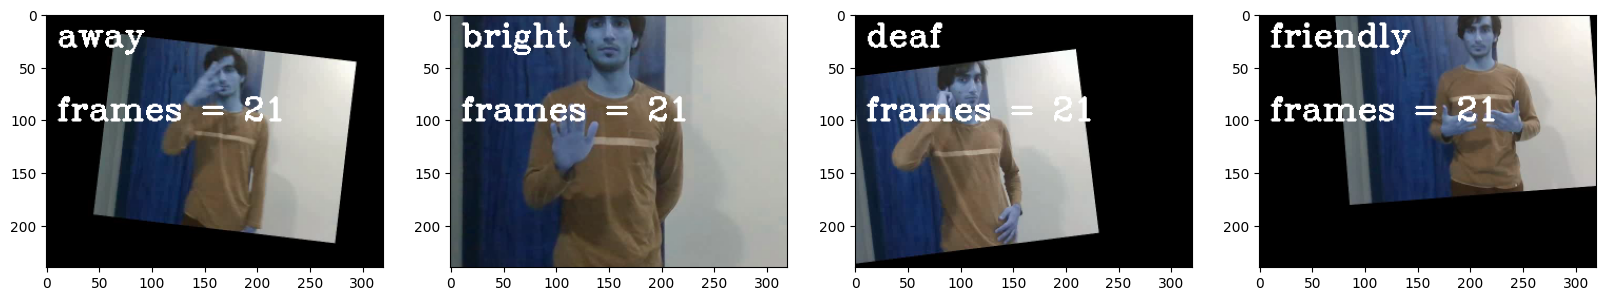

In [88]:
data_dir = 'datasets/augmented'
all_class_names = os.listdir(data_dir)

# random_range = random.sample(range(len(all_class_names)),20)
random_range = [0,1,2,3]

plt.figure(figsize=(20,20))

for counter,random_index in enumerate(random_range,1):
    selected_class_name = all_class_names[random_index]
    video_files_names_list = os.listdir(os.path.join(data_dir,selected_class_name))
    selected_video_file_name = random.choice(video_files_names_list)
    
    cap = cv2.VideoCapture(os.path.join(data_dir,selected_class_name,selected_video_file_name))
    
    ret,frame = cap.read()
    video_frames_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    frame = cv2.resize(frame,(image_width,image_height))
  
    # frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(frame.shape)
   
    
    cv2.putText(frame,selected_class_name,(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
    cv2.putText(frame,'frames = {}'.format(video_frames_count),(10,100),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
    
    plt.subplot(5,4,counter)
    plt.imshow(frame,cmap='gray')

In [89]:
mp_holistic = mp.solutions.holistic      #Holistic model (detects)
mp_drawing = mp.solutions.drawing_utils  #drawing utilities   (draws)
mp_drawing_styles = mp.solutions.drawing_styles

holistic = mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)


def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(101,111,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(101,111,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(101,111,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             )

In [92]:
def extract_frames(video_path):
    
    cap = cv2.VideoCapture(video_path)
    
    frames = []
    
    while(True):
        ret,frame = cap.read()
        
        if ret:
            frames.append(frame)
        else:
            break
            
    cap.release()
    cv2.destroyAllWindows()
    
    
    return frames

def extract_keypoints(frames):
    
    keypoints = []
    
    for frame in frames:
        frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        
        if results.pose_landmarks:
            pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
        else:
            pose = np.zeros(132)
        
        if results.left_hand_landmarks:
            lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()
        else:
            lh = np.zeros(21*3)
            
        if results.right_hand_landmarks:
            rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten()
        else:
            rh = np.zeros(21*3)
            
        
        points = np.concatenate([lh,pose,rh]).astype(np.float32)
        
        keypoints.append(points)
        
    
    return keypoints
            
        

In [93]:
features = []
labels = []

for sign_num,sign in enumerate(classes_list):
    for video in os.listdir(f'datasets/augmented/{sign}'):
        
        frames = extract_frames(f'datasets/augmented/{sign}/{video}')
        keypoints = extract_keypoints(frames)
        
        features.append(keypoints)
        labels.append(sign_num)
        
        print(f'Done for {sign} video {video}')
    print(f'Done for {sign}')
        

Done for sad video 0.mp4
Done for sad video 1.mp4
Done for sad video 10.mp4
Done for sad video 100.mp4
Done for sad video 101.mp4
Done for sad video 102.mp4
Done for sad video 103.mp4
Done for sad video 104.mp4
Done for sad video 105.mp4
Done for sad video 106.mp4
Done for sad video 107.mp4
Done for sad video 108.mp4
Done for sad video 109.mp4
Done for sad video 11.mp4
Done for sad video 110.mp4
Done for sad video 111.mp4
Done for sad video 112.mp4
Done for sad video 113.mp4
Done for sad video 114.mp4
Done for sad video 115.mp4
Done for sad video 116.mp4
Done for sad video 117.mp4
Done for sad video 118.mp4
Done for sad video 119.mp4
Done for sad video 12.mp4
Done for sad video 120.mp4
Done for sad video 121.mp4
Done for sad video 122.mp4
Done for sad video 123.mp4
Done for sad video 124.mp4
Done for sad video 125.mp4
Done for sad video 126.mp4
Done for sad video 127.mp4
Done for sad video 128.mp4
Done for sad video 129.mp4
Done for sad video 13.mp4
Done for sad video 130.mp4
Done for 

In [95]:
for index,video in enumerate(features):
    if len(video) == 21:
        features[index] = video[1:]

In [96]:
len(features[76])

20

In [97]:
features = np.array(features)

labels = np.array(labels)
labels = to_categorical(labels)


In [98]:
features.shape

(5850, 20, 258)

In [99]:
f = open('data.pickle','wb')
pickle.dump({'features' : features, 'labels': labels},f)
f.close()